<a href="https://colab.research.google.com/github/letpires/bootcamp_alura/blob/main/An%C3%A1lise_populacional_de_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkslateblue">RESUMO**
---

O objetivo do projeto foi analisar como o número de habitantes do estado de Santa Catarina variou entre os anos de 1970 e 2020. São diversos os fatores que podem interferir na dinâmica populacional, como taxa de mortalidade e taxa de natalidade. 

Sendo assim, neste notebook foram analisadas a mortalidade, natalidade e o crescimento vegetativo (que nada mais é que a relação entre os outros dois) e os possíveis impactos na população do estado de Santa Catarina.

Além disso, também fez-se uma análise entre os anos de 2018 a 2020 para verificar se já havia algum indício de aumento no número de óbitos, que poderia indicar a presença do coronavírus nos meses de novembro e dezembro de 2019 e janeiro, fevereiro e março de 2020.

---



#**<font color="darkslateblue">ANÁLISE DOS DADOS**

In [ ]:
#Importação das bibliotecas que serão usadas nesse notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm
import seaborn as sns
import matplotlib.patches as mpatches

##**<font color="hotpink">1. Análise dos dados de Santa Catarina**




**População do estado de Santa Catarina:**

A partir do Wikipedia, com base nos dados do IBGE, foi possível encontrar a população nos anos 1970, 1980, 1991, 1996, 2000, 2010, 2017 e 2019 do Estado de Santa Catarina. 

Como não foi encontrada a população de todos os anos desde 1970, foi calculado um fator de acréscimo para preencher os anos faltantes. Para isso, considerou-se a diferença populacional dos anos disponíveis e dividiu-se pela diferença entre os anos. 

Exemplo:

- Ano de 1991: 4.538.248 habitantes
- Ano de 1996: 4.875.244 habitantes

      fator de acréscimo = (Ano de 1996 - Ano de 1991) / (1996 - 1991)
      fator de acréscimo = (4538248 - 4875244) / 5
      fator de acréscimo = 67.399,20

Portanto:

      Ano 1992 = Ano 1991 + fator de acréscimo
      Ano 1993 = Ano 1992 + fator de acréscimo
      Ano 1994 = Ano 1993 + fator de acréscimo
      Ano 1995 = Ano 1994 + fator de acréscimo

A partir desses cálculos, foi possível criar um dataframe com a população de todos os anos, desde 1970 até 2020. 

###**População do Estado de Santa Catarina entre os anos de 1970 à 2019**


In [ ]:
# Coleta de dados do IBGE e criação de dicionário com o ano e a população.  

populacao = {1970:	2930411,
             1980:	3687652,
             1991:	4538248,
             1996:	4875244,
             2000:	5349580,
             2010:	6248436,
             2017:	7001161,
             2019:	7165000}

###**Preenchimento dos anos faltantes**

O preenchimento dos anos faltantes foi feito com base no fator de acréscimo calculado anteriormente. Além disso, também adicionou-se esses dados ao dicionário 'populacao'.

In [ ]:
# Preenchimento dos anos de 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978 e 1979.

acrescimo = (populacao[1980] - populacao[1970]) // 10

populacao[1971] = populacao[1970] + acrescimo
populacao[1972] = populacao[1971] + acrescimo
populacao[1973] = populacao[1972] + acrescimo
populacao[1974] = populacao[1973] + acrescimo
populacao[1975] = populacao[1974] + acrescimo
populacao[1976] = populacao[1975] + acrescimo
populacao[1977] = populacao[1976] + acrescimo
populacao[1978] = populacao[1977] + acrescimo
populacao[1979] = populacao[1978] + acrescimo


In [ ]:
# Preenchimento dos anos de 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988 e 1989.

acrescimo = (populacao[1991] - populacao[1980]) // 11

populacao[1981] = populacao[1980] + acrescimo
populacao[1982] = populacao[1981] + acrescimo
populacao[1983] = populacao[1982] + acrescimo
populacao[1984] = populacao[1983] + acrescimo
populacao[1985] = populacao[1984] + acrescimo
populacao[1986] = populacao[1985] + acrescimo
populacao[1987] = populacao[1986] + acrescimo
populacao[1988] = populacao[1987] + acrescimo
populacao[1989] = populacao[1988] + acrescimo
populacao[1990] = populacao[1989] + acrescimo

In [ ]:
# Preenchimento dos anos de 1992, 1993, 1994 e 1995.

acrescimo = (populacao[1996] - populacao[1991]) // 5

populacao[1992] = populacao[1991] + acrescimo
populacao[1993] = populacao[1992] + acrescimo
populacao[1994] = populacao[1993] + acrescimo
populacao[1995] = populacao[1994] + acrescimo


In [ ]:
# Preenchimento dos anos de 1997, 1998 e 1999.

acrescimo = (populacao[2000] - populacao[1996]) // 5

populacao[1997] = populacao[1996] + acrescimo
populacao[1998] = populacao[1997] + acrescimo
populacao[1999] = populacao[1998] + acrescimo

In [ ]:
# Preenchimento dos anos de 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008 e 2009.

acrescimo = (populacao[2010] - populacao[2000]) // 10

populacao[2001] = populacao[2000] + acrescimo
populacao[2002] = populacao[2001] + acrescimo
populacao[2003] = populacao[2002] + acrescimo
populacao[2004] = populacao[2003] + acrescimo
populacao[2005] = populacao[2004] + acrescimo
populacao[2006] = populacao[2005] + acrescimo
populacao[2007] = populacao[2006] + acrescimo
populacao[2008] = populacao[2007] + acrescimo
populacao[2009] = populacao[2008] + acrescimo

In [ ]:
# Preenchimento dos anos de 2011, 2012, 2013, 2014, 2015, 2016.

acrescimo = (populacao[2017] - populacao[2010]) // 7

populacao[2011] = populacao[2010] + acrescimo
populacao[2012] = populacao[2011] + acrescimo
populacao[2013] = populacao[2012] + acrescimo
populacao[2014] = populacao[2013] + acrescimo
populacao[2015] = populacao[2014] + acrescimo
populacao[2016] = populacao[2015] + acrescimo

In [ ]:
# Preenchimento do ano de 2018.

acrescimo = (populacao[2019] - populacao[2017]) // 2

populacao[2018] = populacao[2017] + acrescimo

###**Criação do DataFrame**

In [ ]:
# Criação do dataframe com o dicionário 'populacao'.

dados_populacao = pd.DataFrame(populacao, index=[0])
dados_populacao.head()

,1970,1980,1991,1996,2000,2010,2017,2019,1971,1972,1973,1974,1975,1976,1977,1978,1979,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1992,1993,1994,1995,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2011,2012,2013,2014,2015,2016,2018
0,2930411,3687652,4538248,4875244,5349580,6248436,7001161,7165000,3006135,3081859,3157583,3233307,3309031,3384755,3460479,3536203,3611927,3764978,3842304,3919630,3996956,4074282,4151608,4228934,4306260,4383586,4460912,4605647,4673046,4740445,4807844,4970111,5064978,5159845,5439465,5529350,5619235,5709120,5799005,5888890,5978775,6068660,6158545,6355968,6463500,6571032,6678564,6786096,6893628,7083080


In [ ]:
#Transpondo (trocando linha por coluna) os dados da população, renomeando a coluna e colocando o índice (ano) em ordem crescente.

dados_populacao = dados_populacao.T
dados_populacao = dados_populacao.rename(columns={0: "populacao"}).sort_index()
dados_populacao

,populacao
1970,2930411
1971,3006135
1972,3081859
1973,3157583
1974,3233307
1975,3309031
1976,3384755
1977,3460479
1978,3536203
1979,3611927


In [ ]:
dados_populacao.rename_axis('year')

,populacao
year,
1970,2930411
1971,3006135
1972,3081859
1973,3157583
1974,3233307
1975,3309031
1976,3384755
1977,3460479
1978,3536203


####<font color="darkturquoise">**FIGURA 1. População do estado de Santa Catarina: 1970 a 2019**

In [ ]:
# Para melhorar a visualização foi dividido a população por 1.000.000 e foi salvo em uma nova variável

dados2_populacao = dados_populacao/10**6
dados2_populacao.head()

,populacao
1970,2.930411
1971,3.006135
1972,3.081859
1973,3.157583
1974,3.233307


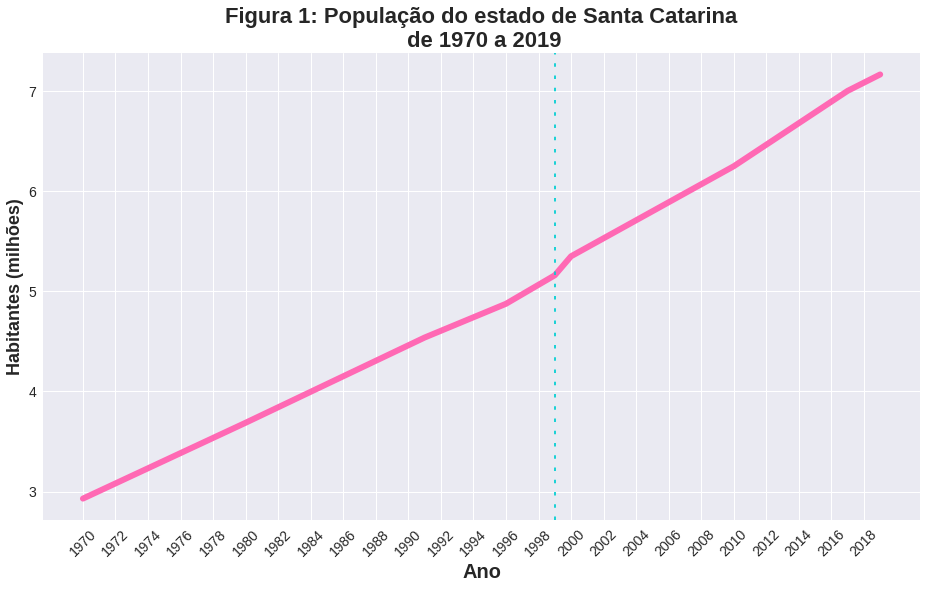

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Habitantes (milhões)", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1970, 2019, step=2), fontsize=14, rotation=45)

sns.lineplot(x=dados2_populacao.index, y="populacao", data=dados2_populacao, linewidth=6, color="hotpink")

plt.title((f"Figura 1: População do estado de Santa Catarina\n de 1970 a 2019"), fontsize=22, fontweight="bold")
plt.axvline(x=1999, dashes=(2,5), color="darkturquoise");

###**COMENTÁRIOS**

- Em 1970, a população do estado de Santa Catarina era de aproximadamente 3 milhões de habitantes, e em 2019, de aproximadamente 7 milhões de habitantes, representando um aumento de aproximadamente 130%. 
- É possível visualizar também que a população manteu um crescimento exponencial, tendo um ponto em 1999 com um aumento fora do normal, que pode ter ocorrido por conta de algum evento específico ou erro por conta do fator de acréscimo.

##**<font color="hotpink">2. Análise dos óbitos do estado de SC**


###**Importação dos dados**

In [ ]:
#Leitura do arquivo e atribuição à uma variável como DataFrame. Arquivo coletado do github e que servirá como base de dados para o desafio do módulo 01.

obitos_csv="https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/obitos-registro-civil.csv"
obitos=pd.read_csv(obitos_csv, encoding="ISO-8859-1", decimal=",", na_values="-", engine="python")

obitos.head()

,year,month,state,deaths
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


###**Filtro dos óbitos do estado de SC**
Como o objetivo é analisar apenas a população do estado de Santa Catarina, foi necessário eliminar todos os outros dados de outros estados.

In [ ]:
# Buscando óbitos do estado de SC e criando uma nova variável

obitos_sc = obitos.query("state == 'SC'")
obitos_sc.head()

,year,month,state,deaths
16,1970,1,SC,266
33,1970,2,SC,233
49,1970,3,SC,255
67,1970,4,SC,227
84,1970,5,SC,214


In [ ]:
# Retirada da coluna state pra não ficar repetindo

obitos_sc = obitos_sc.drop(columns=['state'])
obitos_sc

,year,month,deaths
16,1970,1,266
33,1970,2,233
49,1970,3,255
67,1970,4,227
84,1970,5,214
...,...,...,...
14918,2020,4,3596
14945,2020,5,3196
14972,2020,6,3637
14999,2020,7,4450


In [ ]:
# Alterando o nome dos meses, através da criação de um dicionário.

meses = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun", 
         7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"}
obitos_sc.month = obitos_sc.month.map(meses)
obitos_sc

,year,month,deaths
16,1970,Jan,266
33,1970,Fev,233
49,1970,Mar,255
67,1970,Abr,227
84,1970,Mai,214
...,...,...,...
14918,2020,Abr,3596
14945,2020,Mai,3196
14972,2020,Jun,3637
14999,2020,Jul,4450


In [ ]:
# Trocando os números do índice pelo ano.

obitos_sc.set_index("year", inplace=True)
obitos_sc.head()

,month,deaths
year,,
1970,Jan,266
1970,Fev,233
1970,Mar,255
1970,Abr,227
1970,Mai,214


In [ ]:
# agrupando os óbitos por ano e salvando numa nova variável

obitos_ano_sc = obitos_sc.groupby(by=["year"])["deaths"].agg("sum").reset_index()
obitos_ano_sc

,year,deaths
0,1970,2922
1,1971,3097
2,1972,3331
3,1973,3658
4,1974,3771
5,1975,3284
6,1976,6148
7,1977,5862
8,1978,5468
9,1979,5548


In [ ]:
# colocando os anos no índice
obitos_ano_sc.set_index("year", inplace=True)
obitos_ano_sc

,deaths
year,
1970,2922
1971,3097
1972,3331
1973,3658
1974,3771
1975,3284
1976,6148
1977,5862
1978,5468


####<font color="darkturquoise">**FIGURA 2. Total de óbitos nos anos de 1970 até 2020 no Estado de SC**

Text(0.5, 1.0, 'Figura 2: Total de óbitos nos anos de 1970 até 2020\nno Estado de Santa Catarina')

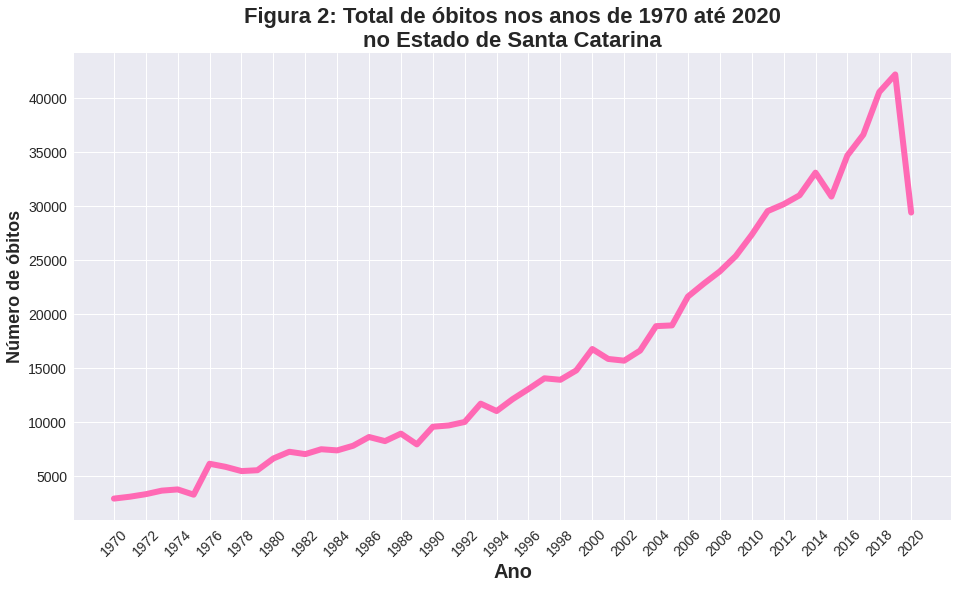

In [ ]:
# gráfico do total de óbitos de todos os anos (de 1980 até 2020)

plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1970, 2021, step=2), fontsize=14, rotation=45)

sns.lineplot(x=obitos_ano_sc.index, y="deaths", data=obitos_ano_sc, linewidth=6, color="hotpink")

plt.title((f"Figura 2: Total de óbitos nos anos de 1970 até 2020\nno Estado de Santa Catarina"), 
            fontsize=22, fontweight="bold")



###**COMENTÁRIOS**
- É possível visualizar o crescimento no número absoluto de óbitos ao longo dos anos, com oscilações, sendo que em 1970 foram registrados 2922 óbitos, enquanto que em 2019 foram 42.186 óbitos, aumento de 1344%. 


##**<font color="hotpink">3. Análise dos óbitos por mês em cada década**

In [ ]:
# Definindo as décadas de 80, 90, 2000 e 2010 e salvando em suas respectivas variáveis (para análises posteriores)
# esses datasets contêm a coluna "month"

obitos_70 = obitos_sc.loc[1970:1979]
obitos_80 = obitos_sc.loc[1980:1989]
obitos_90 = obitos_sc.loc[1990:1999]
obitos_00 = obitos_sc.loc[2000:2009]
obitos_10 = obitos_sc.loc[2010:2019]

In [ ]:
obitos_80.month.value_counts()

Set    10
Mai    10
Nov    10
Fev    10
Ago    10
Mar    10
Jul    10
Jun    10
Out    10
Jan    10
Dez    10
Abr    10
Name: month, dtype: int64

####**<font color="darkturquoise">FIGURA 3. Óbitos da década de 1970**

Text(0.5, 1.0, 'Figura 3: Óbitos durante a década de 1970 no Estado de Santa Catarina')

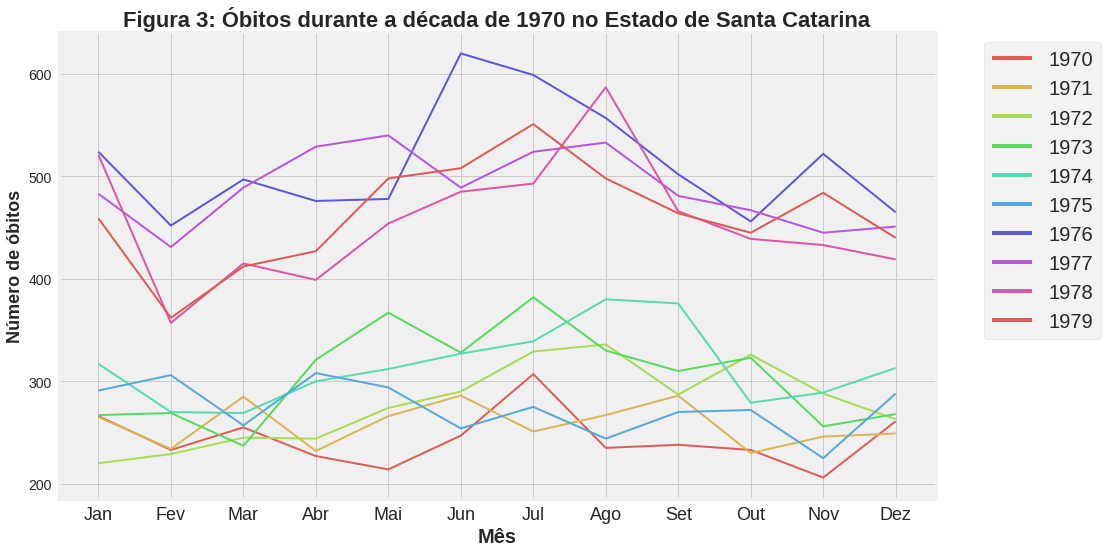

In [ ]:
# gráfico dos óbitos dos meses dos anos 80
plt.figure(figsize=(14,8))
plt.style.use("fivethirtyeight")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_70, linewidth=2, palette="hls", legend="full")

plt.legend(fontsize="x-large", frameon=True, bbox_to_anchor=(1.20,1))

plt.title((f"Figura 3: Óbitos durante a década de 1970 no Estado de Santa Catarina"), fontsize=22, fontweight="bold")

#plt.xlim(-1,12)
#plt.ylim(12000,32000);


####**<font color="darkturquoise">FIGURA 4. Óbitos da década de 1980**

Text(0.5, 1.0, 'Figura 4: Óbitos durante a década de 1980 no Estado de Santa Catarina')

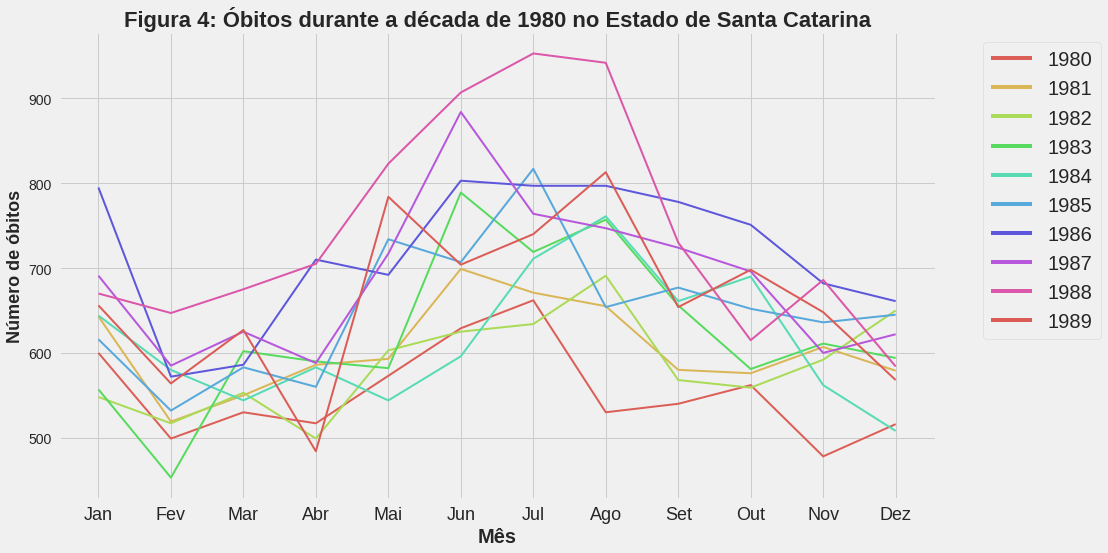

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("fivethirtyeight")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_80, linewidth=2, palette="hls", legend="full")

plt.legend(fontsize="x-large", frameon=True, bbox_to_anchor=(1.20,1))

plt.title((f"Figura 4: Óbitos durante a década de 1980 no Estado de Santa Catarina"), fontsize=22, fontweight="bold")

####**<font color="darkturquoise">FIGURA 5. Óbitos da década de 1990**

Text(0.5, 1.0, 'Figura 5: Óbitos durante a década de 1990 no Estado de Santa Catarina')

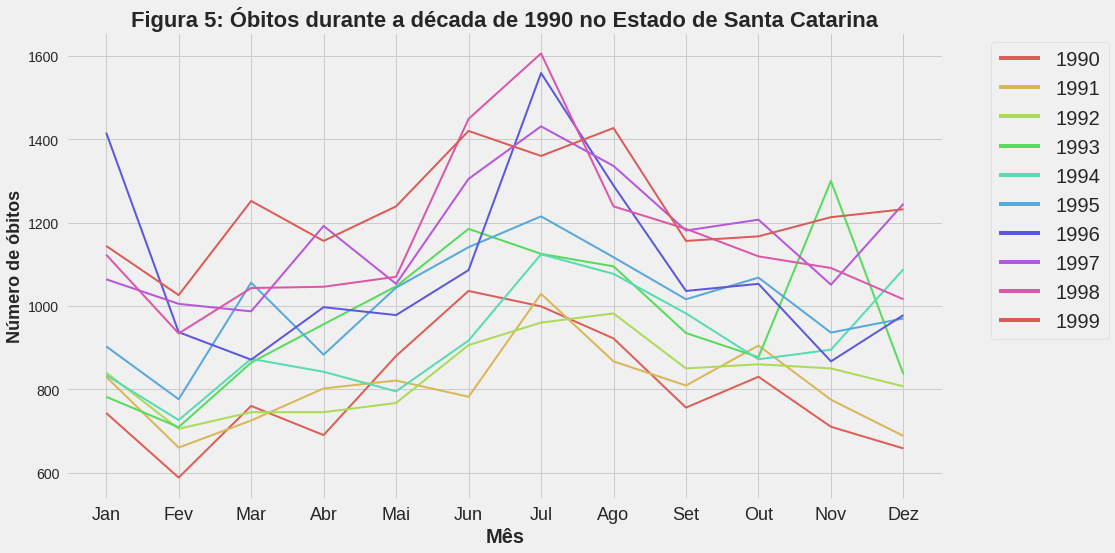

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("fivethirtyeight")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_90, linewidth=2, palette="hls", legend="full")

plt.legend(fontsize="x-large", frameon=True, bbox_to_anchor=(1.20,1))

plt.title((f"Figura 5: Óbitos durante a década de 1990 no Estado de Santa Catarina"), fontsize=22, fontweight="bold")

####**<font color="darkturquoise">FIGURA 6. Óbitos da década de 2000**

Text(0.5, 1.0, 'Figura 5: Óbitos durante a década de 2000 no Estado de Santa Catarina')

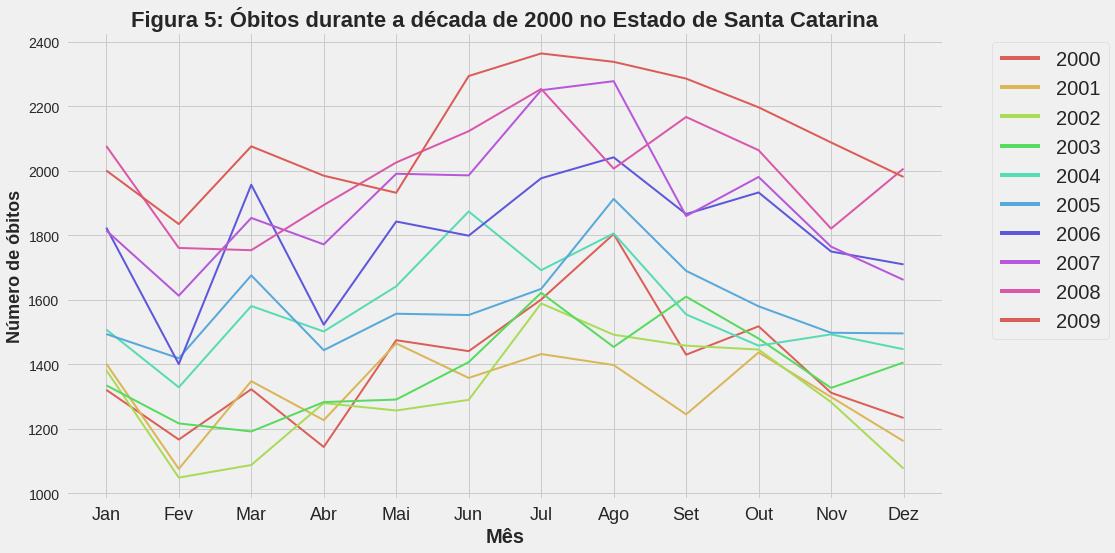

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("fivethirtyeight")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_00, linewidth=2, palette="hls", legend="full")

plt.legend(fontsize="x-large", frameon=True, bbox_to_anchor=(1.20,1))

plt.title((f"Figura 5: Óbitos durante a década de 2000 no Estado de Santa Catarina"), fontsize=22, fontweight="bold")

####**<font color="darkturquoise">FIGURA 7. Óbitos da década de 2010**


Text(0.5, 1.0, 'Figura 5: Óbitos durante a década de 2010 no Estado de Santa Catarina')

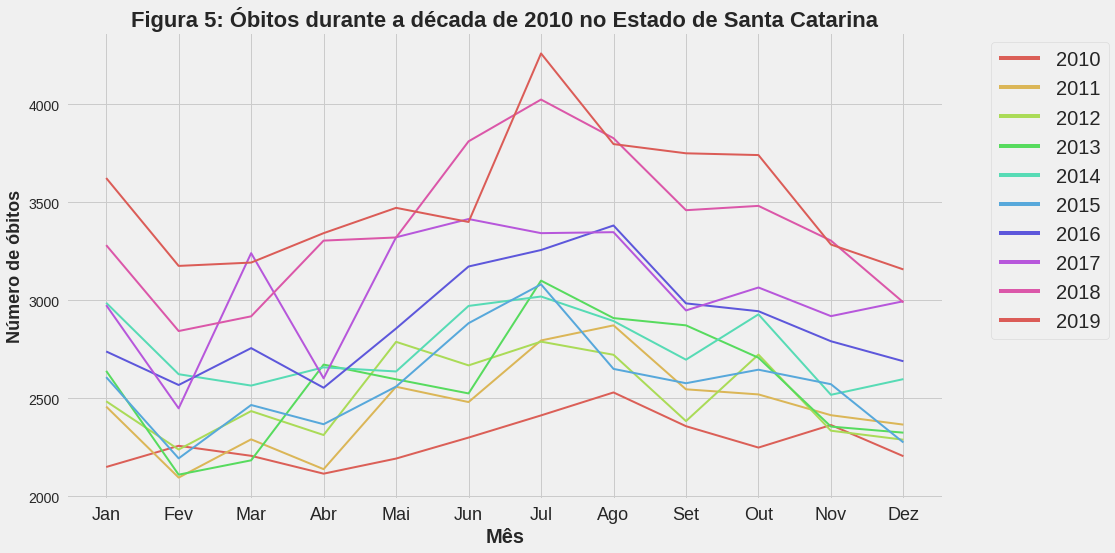

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("fivethirtyeight")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_10, linewidth=2, palette="hls", legend="full")

plt.legend(fontsize="x-large", frameon=True, bbox_to_anchor=(1.20,1))

plt.title((f"Figura 5: Óbitos durante a década de 2010 no Estado de Santa Catarina"), fontsize=22, fontweight="bold")

###**COMENTÁRIOS**
- É possível verificar, através das figuras 3 a 7, que todos os anos iniciam com um número maior de óbitos em janeiro, e em fevereiro há uma queda. Além disso, observa-se também que há uma tendência de aumento do número de óbitos conforme se aproxima do meio do ano, entre maio a julho;
- Também observa-se que com o passar das décadas, as linhas vão se deslocando e se concentrando na região superior do gráfico, o que indica um aumento absoluto no número de óbitos.



##<font color="hotpink">**4. Taxa de mortalidade**
Verificação se há alguma relação no tamanho populacional e número de óbitos.

In [ ]:
#Criação de um dataframe com obitos e população

taxa_mortalidade = pd.concat([obitos_ano_sc.deaths, dados_populacao.populacao], axis=1)
taxa_mortalidade.head()

,deaths,populacao
1970,2922,2930411.0
1971,3097,3006135.0
1972,3331,3081859.0
1973,3658,3157583.0
1974,3771,3233307.0


In [ ]:
# Criação de uma nova coluna de Taxa de Mortalidade ( = (óbitos * 1000) / população)

taxa_mortalidade["tx_mortalidade"] = (taxa_mortalidade.deaths * 1000) / taxa_mortalidade.populacao
taxa_mortalidade.head()

,deaths,populacao,tx_mortalidade
1970,2922,2930411.0,0.997130
1971,3097,3006135.0,1.030227
1972,3331,3081859.0,1.080841
1973,3658,3157583.0,1.158481
1974,3771,3233307.0,1.166298


####**<font color="darkturquoise">FIGURA 8. Taxa de mortalidade em SC**

Text(0.5, 1.0, 'Figura 8: Taxa de mortalidade do estado de Santa Catarina \n entre 1970 e 2019')

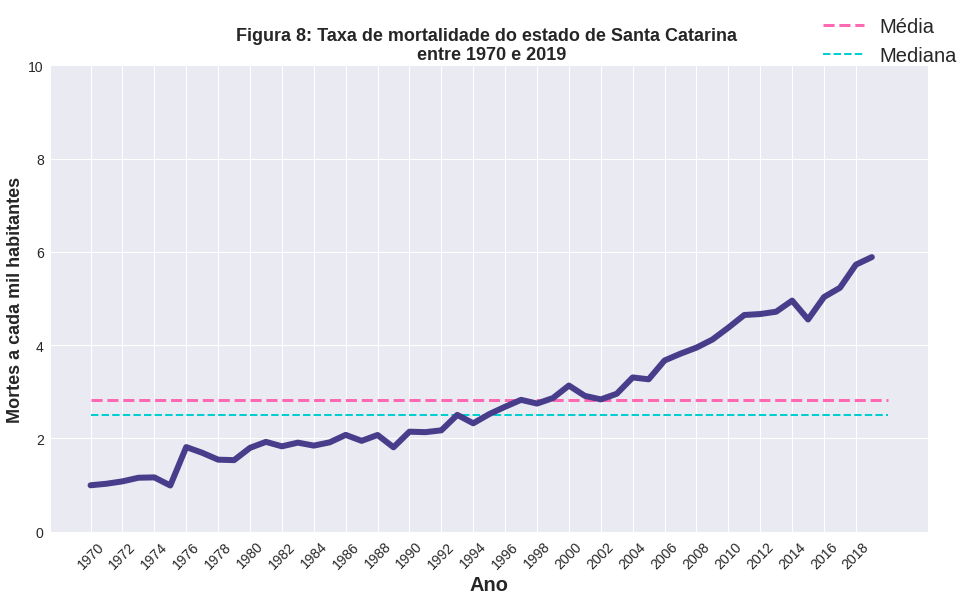

In [ ]:
# gráfico da taxa de mortalidade de todos os anos (de 1980 até 2019)
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

media = taxa_mortalidade.tx_mortalidade.mean()
mediana = taxa_mortalidade.tx_mortalidade.median()

linha_media = plt.hlines(y=media, xmin=1970, xmax=2020, color="hotpink", linestyles="dashed", linewidth=3)
linha_mediana = plt.hlines(y=mediana, xmin=1970, xmax=2020, color="darkturquoise", linestyles="dashed", linewidth=2)
plt.figlegend((linha_media, linha_mediana),('Média', 'Mediana'), fontsize="x-large")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Mortes a cada mil habitantes", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1970, 2019, step=2), fontsize=14, rotation=45)

plt.ylim(0,10)

sns.lineplot(x=taxa_mortalidade.index, y="tx_mortalidade", data=taxa_mortalidade, 
               linewidth=6, color="darkslateblue", legend="full")

plt.title((f"Figura 8: Taxa de mortalidade do estado de Santa Catarina \n entre 1970 e 2019"), fontsize=18, fontweight="bold")

In [ ]:
taxa_mortalidade.tx_mortalidade.describe()

count    50.000000
mean      2.817410
std       1.341258
min       0.992436
25%       1.835832
50%       2.513997
75%       3.781547
max       5.887788
Name: tx_mortalidade, dtype: float64

In [ ]:
taxa_mortalidade.tx_mortalidade.median()

2.5139973124699644

###**COMENTÁRIOS**
- A taxa de mortalidade média foi de 2,81 e a amplitude dos dados foi relativamente alta, sendo a maior taxa de mortalidade igual a 5,89 e a menor igual a 0,99, mostrando um desequilíbrio, ou seja, o aumento de óbitos não foi proporcional ao aumento da população. A mediana também foi semelhante à media, com valor de 2.51, mostrando que as taxas de mortalidade estão simétricas. 
- O desvio padrão ficou em torno de 1.34, o que mostra que os valores estão um pouco dispersos.
- De 1994 a 2018 houve aumento na taxa de mortalidade, o que é estranho, já que houve avanços na medicina, acesso a vacinas, medicamentos e maiores cuidados com a saúde.

##<font color="hotpink">**5. Análise dos nascidos vivos no estado de SC**


In [ ]:
# Leitura do arquivo

dados_vivos_csv = "https://raw.githubusercontent.com/letpires/bootcamp_alura/main/A164353189_28_143_208.csv"
dados_vivos = pd.read_csv(dados_vivos_csv, sep=";",
                          skiprows=3, skipfooter=14, encoding="ISO-8859-1")


dados_vivos=dados_vivos.drop(columns=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro', 'Ignorado'])

#Trocando o index pelo ano do nascimento
dados_vivos.set_index("Ano do nascimento", inplace=True)
dados_vivos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """


,Total
Ano do nascimento,
1994,85531
1995,98776
1996,100310
1997,97717
1998,96123
1999,98854
2000,94828
2001,88097
2002,85730


####**<font color="darkturquoise">FIGURA 9. Número de nascidos vivos de 1994 a 2018**

Text(0.5, 1.0, 'Figura 8: Total de nascidos vivos entre os anos de 1994 e 2018\nno Estado de Santa Catarina')

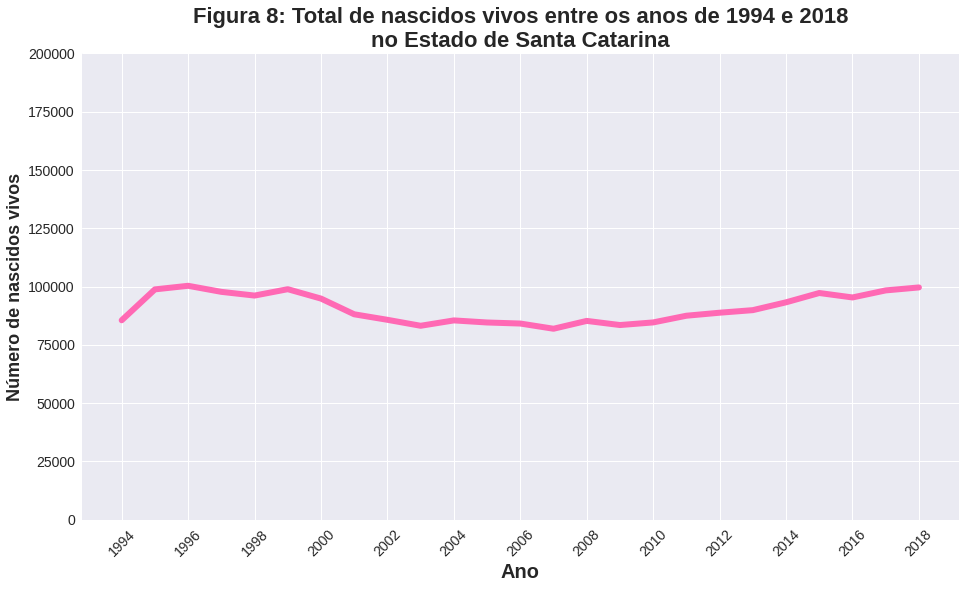

In [ ]:
# gráfico do total de nascidos vivos de todos os anos (de 1994 até 2018)
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Número de nascidos vivos", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks( np.arange(1994, 2020, step=2), fontsize=14, rotation=45)

plt.ylim(0, 200000)

sns.lineplot(x=dados_vivos.index, y="Total", data=dados_vivos, linewidth=6, color="hotpink")

plt.title((f"Figura 8: Total de nascidos vivos entre os anos de 1994 e 2018\nno Estado de Santa Catarina"), 
            fontsize=22, fontweight="bold")

In [ ]:
dados_vivos.loc[2001]

Total    88097
Name: 2001, dtype: int64

In [ ]:
dados_vivos.loc[1999]

Total    98854
Name: 1999, dtype: int64

In [ ]:
dados_vivos.loc[2002]

Total    85730
Name: 2002, dtype: int64

###**COMENTÁRIOS**
- Verificou-se que houve uma queda suave no número de nascidos a partir de 1999, sendo recuperado no ano de 2018. 
- Em 1999, foram registrados 98.854 nascidos vivos e em 2002 caiu pra 85.730 nascidos vivos, representando uma redução de 13,27%.
- De modo geral, o número de nascidos vivos em Santa Catarina se manteve constante.

##<font color="hotpink">**6. Taxa de Natalidade**

In [ ]:
# criado um dataset com a população e os nascidos vivos
taxa_natalidade = pd.concat([dados_vivos.Total, (dados2_populacao.populacao)*(10**6)], axis=1)

In [ ]:
# criando uma coluna com a taxa de natalidade = (nascidos vivos * 1000) / população
taxa_natalidade["tx_natalidade"] = (taxa_natalidade.Total * 1000) / taxa_natalidade.populacao
taxa_natalidade

,Total,populacao,tx_natalidade
1970,NaN,2930411.0,NaN
1971,NaN,3006135.0,NaN
1972,NaN,3081859.0,NaN
1973,NaN,3157583.0,NaN
1974,NaN,3233307.0,NaN
1975,NaN,3309031.0,NaN
1976,NaN,3384755.0,NaN
1977,NaN,3460479.0,NaN
1978,NaN,3536203.0,NaN
1979,NaN,3611927.0,NaN


####**<font color="darkturquoise">FIGURA 10. Taxa de natalidade em SC**

Text(0.5, 1.0, 'Figura 10:Taxa de natalidade no estado de Santa Catarina\n entre 1994 e 2018')

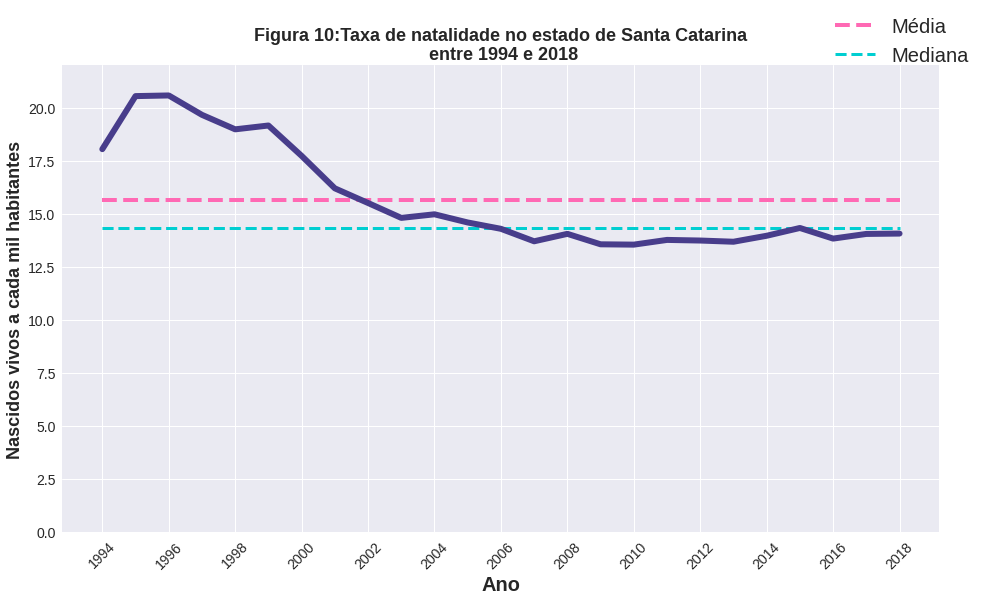

In [ ]:
# gráfico da taxa de natalidade de todos os anos (de 1994 até 2018)
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

media = taxa_natalidade.tx_natalidade.mean()
mediana = taxa_natalidade.tx_natalidade.median()

linha_media = plt.hlines(y=media, xmin=1994, xmax=2018, color="hotpink", linestyles="dashed", linewidth=4)
linha_mediana = plt.hlines(y=mediana, xmin=1994, xmax=2018, color="darkturquoise", linestyles="dashed", linewidth=3)
plt.figlegend((linha_media, linha_mediana),('Média', 'Mediana'), fontsize="x-large")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Nascidos vivos a cada mil habitantes", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1994, 2019, step=2), fontsize=14, rotation=45)

plt.ylim(0, 22)

sns.lineplot(x=taxa_natalidade.index, y="tx_natalidade", data=taxa_natalidade, linewidth=6, color="darkslateblue")

plt.title((f"Figura 10:Taxa de natalidade no estado de Santa Catarina\n entre 1994 e 2018"), fontsize=18, fontweight="bold")


In [ ]:
taxa_natalidade.tx_natalidade.describe()

count    25.000000
mean     15.651060
std       2.428628
min      13.541149
25%      13.826246
50%      14.326794
75%      17.726251
max      20.575380
Name: tx_natalidade, dtype: float64

In [ ]:
taxa_natalidade.tx_natalidade.median()

14.326794080130902

###**COMENTÁRIOS**
- A taxa de natalidade média foi de 15.6, e a amplitude foi de 7,03
- Em 1994 houve um aumento na taxa de natalidade, que começou a cair em 1996. Essa diminuição na taxa de natalidade pode ser consequência de uma melhoria na qualidade de vida, que passaram a ter mais acesso à saúde e educação.




##<font color="hotpink">**7. Crescimento Vegetativo**

In [ ]:
# criado um dataset com a população e os nascidos vivos
crescimento_vegetativo = pd.concat([taxa_natalidade.tx_natalidade, (taxa_mortalidade.tx_mortalidade)], axis=1)
crescimento_vegetativo

,tx_natalidade,tx_mortalidade
1970,NaN,0.997130
1971,NaN,1.030227
1972,NaN,1.080841
1973,NaN,1.158481
1974,NaN,1.166298
1975,NaN,0.992436
1976,NaN,1.816380
1977,NaN,1.693985
1978,NaN,1.546291
1979,NaN,1.536022


In [ ]:
# criando uma coluna com a taxa de natalidade = (nascidos vivos * 1000) / população
crescimento_vegetativo["crescimento_veg"] = (crescimento_vegetativo.tx_natalidade - crescimento_vegetativo.tx_mortalidade)
crescimento_vegetativo

,tx_natalidade,tx_mortalidade,crescimento_veg
1970,NaN,0.997130,NaN
1971,NaN,1.030227,NaN
1972,NaN,1.080841,NaN
1973,NaN,1.158481,NaN
1974,NaN,1.166298,NaN
1975,NaN,0.992436,NaN
1976,NaN,1.816380,NaN
1977,NaN,1.693985,NaN
1978,NaN,1.546291,NaN
1979,NaN,1.536022,NaN


####**<font color="darkturquoise">FIGURA 11. Crescimento Vegetativo**

Text(0.5, 1.0, 'Figura 11:Crescimento Vegetativo no estado de Santa Catarina\n entre 1994 e 2018')

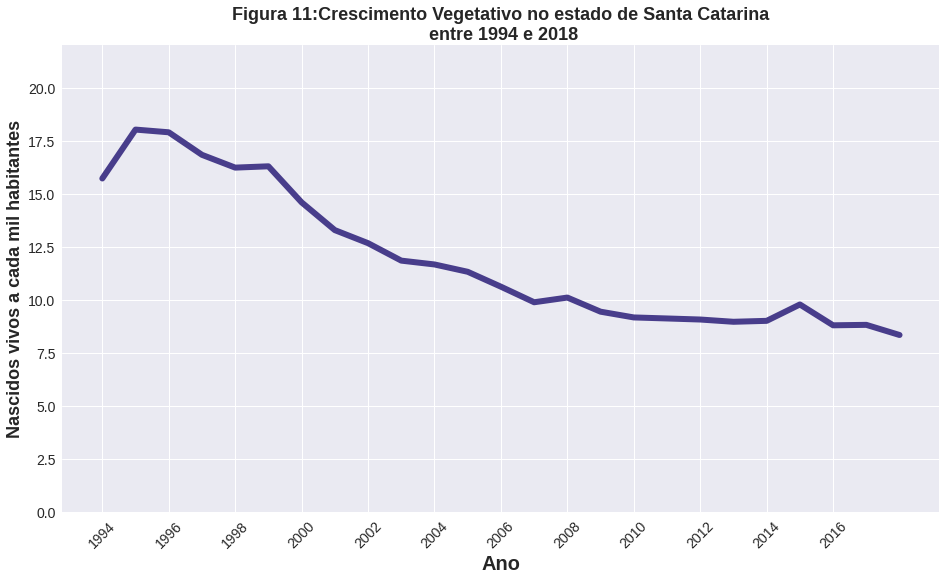

In [ ]:
# gráfico da taxa de natalidade de todos os anos (de 1994 até 2018)
plt.figure(figsize=(14,8))
plt.style.use("seaborn")


plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Nascidos vivos a cada mil habitantes", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1994, 2018, step=2), fontsize=14, rotation=45)

plt.ylim(0, 22)

sns.lineplot(x=crescimento_vegetativo.index, y="crescimento_veg", data=crescimento_vegetativo, linewidth=6, color="darkslateblue")

plt.title((f"Figura 11:Crescimento Vegetativo no estado de Santa Catarina\n entre 1994 e 2018"), fontsize=18, fontweight="bold")

###**COMENTÁRIOS**
- Analisando os dados é possível perceber que a taxa de natalidade foi muito superior a taxa de mortalidade, o que representa que a população está crescendo.
- A partir do gráfico também é possível perceber que de 1994 a 1996 houve um aumento no crescimento vegetativo. E a partir de 1996 começou a cair, representando em seguida um crescimento vegetativo constante ao longo dos anos.
- Além disso o gráfico não apresentou valores negativos, o que mostra também que a taxa de natalidade é maior que a de mortalidade. Caso estivesse próximo de 0, representaria que quase não houve crescimento.

#**<font color="darkslateblue">DESAFIO EXTRA**

- Será que em 2020 teve mais mortes com COVID e alterou o número de óbitos de modo geral? As pessoas ficaram mais em casa, o que pode ter reduzido o número de acidentes.
- É possível notar um aumento de mortes em Novembro e Dezembro de 2019, que poderia indicar uma pandemia?


In [ ]:
obitos_sc.T

year,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1971,1972,1972,1972,1972,1972,1972,1972,1972,1972,1972,1972,1972,1973,1973,1973,1973,...,2017,2017,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020
month,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Jan,Fev,Mar,Abr,...,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago
deaths,266,233,255,227,214,247,307,235,238,233,206,261,265,234,285,232,266,286,251,267,286,230,246,249,220,229,245,244,274,290,329,336,287,326,288,263,267,269,237,321,...,3321,3414,3342,3347,2948,3065,2919,2995,3281,2843,2918,3304,3320,3810,4023,3826,3459,3481,3304,2989,3623,3175,3192,3342,3471,3399,4258,3796,3749,3740,3284,3157,3797,3022,3039,3596,3196,3637,4450,4666


In [ ]:
obitos_2019_2020_sc = obitos_sc.iloc[588:]
obitos_2019_2020_sc

,month,deaths
year,,
2019,Jan,3623
2019,Fev,3175
2019,Mar,3192
2019,Abr,3342
2019,Mai,3471
2019,Jun,3399
2019,Jul,4258
2019,Ago,3796
2019,Set,3749


In [ ]:
obitos_2019_sc = obitos_2019_2020_sc.iloc[:8]
obitos_2019_sc

,month,deaths
year,,
2019,Jan,3623
2019,Fev,3175
2019,Mar,3192
2019,Abr,3342
2019,Mai,3471
2019,Jun,3399
2019,Jul,4258
2019,Ago,3796


####**<font color="darkturquoise">FIGURA 12. Óbitos em SC de Jan/2019 a Ago/2019**

Text(0.5, 1.0, 'Figura 12:Óbitos em SC de Janeiro a Agosto de 2019')

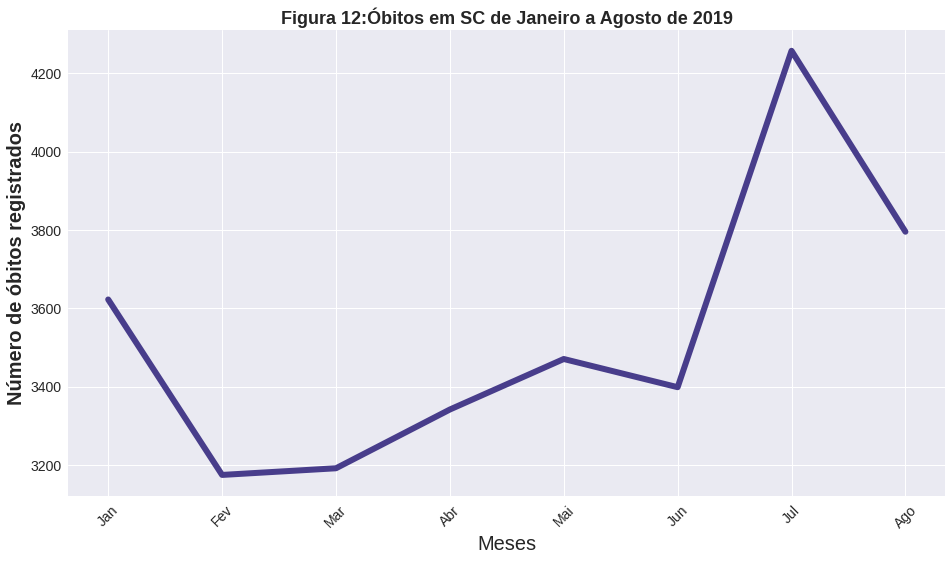

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Meses", fontsize=20)
plt.ylabel("Número de óbitos registrados", fontsize=20, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)


sns.lineplot(x="month", y="deaths", data=obitos_2019_sc, linewidth=6, color="darkslateblue")

plt.title((f"Figura 12:Óbitos em SC de Janeiro a Agosto de 2019"), fontsize=18, fontweight="bold")

In [ ]:
obitos_2020_sc = obitos_2019_2020_sc.iloc[12:]
obitos_2020_sc

,month,deaths
year,,
2020,Jan,3797
2020,Fev,3022
2020,Mar,3039
2020,Abr,3596
2020,Mai,3196
2020,Jun,3637
2020,Jul,4450
2020,Ago,4666


####**<font color="darkturquoise">FIGURA 13. Óbitos em SC de Jan/2020 a Ago/2020**

Text(0.5, 1.0, 'Figura 13: Óbitos em SC de Janeiro a Agosto de 2020')

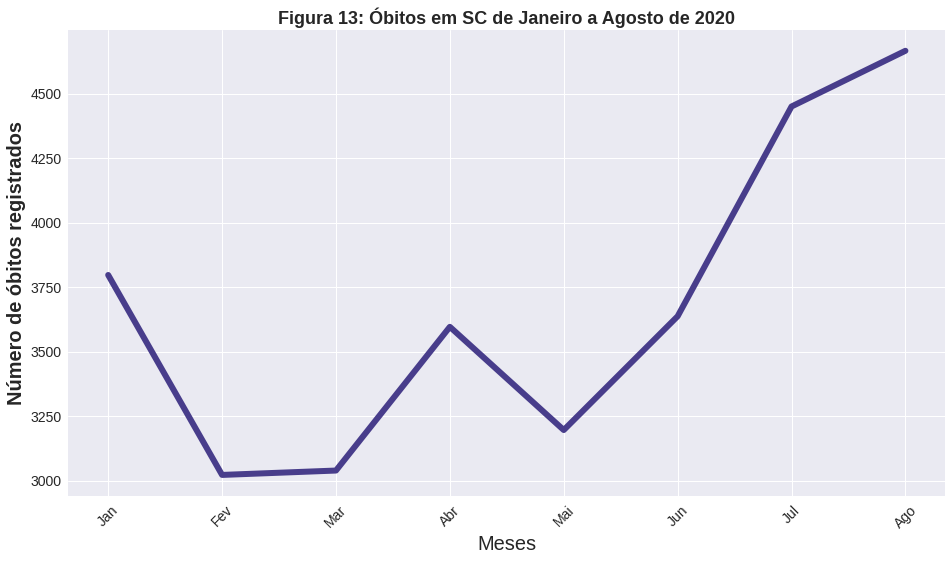

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Meses", fontsize=20)
plt.ylabel("Número de óbitos registrados", fontsize=20, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)


sns.lineplot(x="month", y="deaths", data=obitos_2020_sc, linewidth=6, color="darkslateblue")

plt.title((f"Figura 13: Óbitos em SC de Janeiro a Agosto de 2020"), fontsize=18, fontweight="bold")

In [ ]:
obitos_sc

,month,deaths
year,,
1970,Jan,266
1970,Fev,233
1970,Mar,255
1970,Abr,227
1970,Mai,214
...,...,...
2020,Abr,3596
2020,Mai,3196
2020,Jun,3637


In [ ]:
obitos_2018_2019_sc = obitos_sc.iloc[586:597]
obitos_2018_2019_sc

,month,deaths
year,,
2018,Nov,3304
2018,Dez,2989
2019,Jan,3623
2019,Fev,3175
2019,Mar,3192
2019,Abr,3342
2019,Mai,3471
2019,Jun,3399
2019,Jul,4258


####**<font color="darkturquoise">FIGURA 14. Óbitos em SC de Nov/2018 a Set/2019**

Text(0.5, 1.0, 'Figura 14: Óbitos de Nov/2018 a Set/2019')

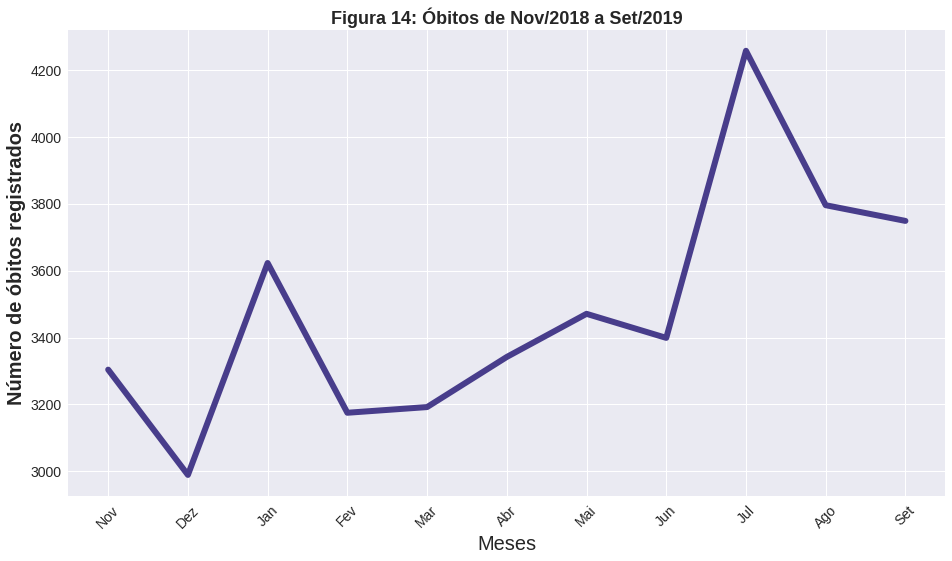

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Meses", fontsize=20)
plt.ylabel("Número de óbitos registrados", fontsize=20, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)


sns.lineplot(x="month", y="deaths", data=obitos_2018_2019_sc, linewidth=6, color="darkslateblue")

plt.title((f"Figura 14: Óbitos de Nov/2018 a Set/2019"), fontsize=18, fontweight="bold")

In [ ]:
obitos2_2019_2020_sc =  obitos_sc.iloc[598:610]
obitos2_2019_2020_sc

,month,deaths
year,,
2019,Nov,3284
2019,Dez,3157
2020,Jan,3797
2020,Fev,3022
2020,Mar,3039
2020,Abr,3596
2020,Mai,3196
2020,Jun,3637
2020,Jul,4450


####**<font color="darkturquoise">FIGURA 15. Óbitos em SC de Nov/2019 a Ago/2020**

Text(0.5, 1.0, 'Figura 15:Óbitos de Nov/2019 a Ago/2020')

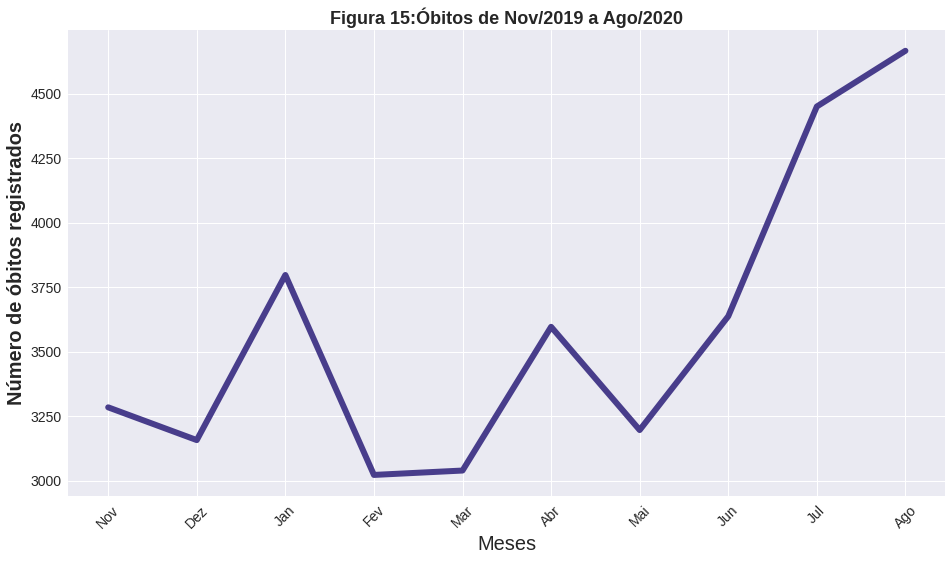

In [ ]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn")

plt.xlabel("Meses", fontsize=20)
plt.ylabel("Número de óbitos registrados", fontsize=20, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)


sns.lineplot(x="month", y="deaths", data=obitos2_2019_2020_sc, linewidth=6, color="darkslateblue")

plt.title((f"Figura 15:Óbitos de Nov/2019 a Ago/2020"), fontsize=18, fontweight="bold")

#**<font color="darkslateblue">CONCLUSÕES**

A análise feita das taxas de natalidade e mortalidade no Brasil permitiu identificar algumas tendências demográficas. Uma delas é a diminuição da taxa de natalidade, que pode ser consequência da melhora de qualidade de vida, aumento da disponibilidade de métodos contraceptivos ou até mesmo a inserção de mulheres no mercado de trabalho.

Com relação a taxa de mortalidade, teve impacto reverso do que se esperava. Ao invés de reduzir, teve um aumento considerável. Imaginava-se que como ao longo dos anos, com a melhora da saúde, qualidade de vida, disposição de vacinas, a taxa de mortalidade seria reduzida.

De todo modo, mesmo que a taxa de natalidade tenha reduzido, a população continua crescendo conforme visto no gráfico de crescimento demográfico. Ou seja, a taxa de natalidade ainda foi superior a taxa de mortalidade.

Com relação ao desafio EXTRA, percebeu-se que a partir de junho de 2020 é que começou um crescimento exponencial no número de óbitos, o que pode ser justificado pelo pico de coronavírus. No entanto, nos meses anteriores não percebeu-se um aumento considerável no número de óbitos em comparação aos anos de 2018 e 2019. 

#**<font color="darkslateblue">REFERÊNCIAS**

https://pt.wikipedia.org/wiki/Santa_Catarina

https://pt.wikipedia.org/wiki/Demografia_de_Santa_Catarina

https://www.kaggle.com/amandalk/registered-deaths-brazil

http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinasc/cnv/nvsp.def

---